In [1]:
import pandas as pd #step0-Importing the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = pd.read_csv(r'C:\Users\sajoshi\Documents\Business _Analytics\udemy_Projects\S&P500_Stock_Data.csv') #step1-Importing dataset

In [3]:
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [4]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Interest Rates    1000 non-null float64
Employment        1000 non-null float64
S&P 500 Price     1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


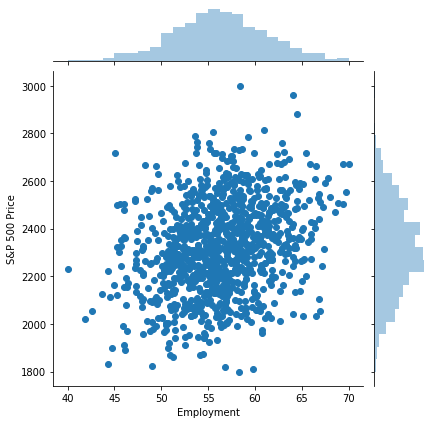

In [6]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock) #Step2-Visualizing the dataset

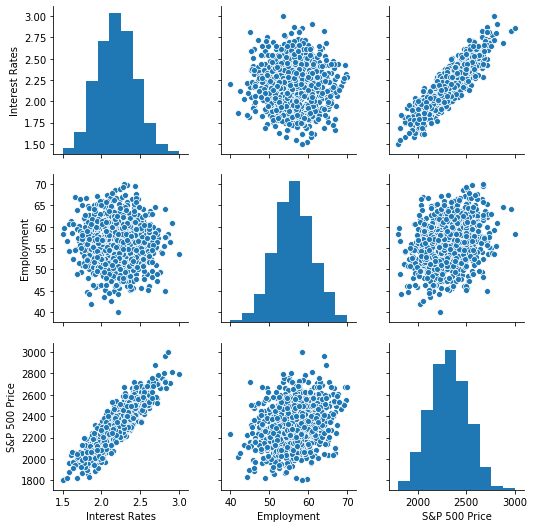

In [8]:
sns.pairplot(stock) 

In [9]:
y = stock ['S&P 500 Price'] #Step3-Creating testing and training data

In [42]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [43]:
X = stock[['Interest Rates', 'Employment']]

In [44]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [46]:
X_train

,Interest Rates,Employment
642,2.206168,56.953324
499,2.140436,51.166702
707,1.956203,61.466621
945,2.608825,53.139361
698,2.121968,57.933532
...,...,...
253,2.374094,51.338191
997,2.009644,57.004357
398,2.054756,54.816941
850,2.279571,53.518258


In [15]:
X_test

,Interest Rates,Employment
547,2.605130,55.624738
657,1.908612,60.866612
273,2.285950,48.081803
924,2.118580,47.286540
355,2.158611,54.334751
...,...,...
477,2.304167,53.670590
216,2.105701,52.408543
269,2.236707,47.256041
604,2.604897,63.036843


In [17]:
from sklearn.linear_model import LinearRegression #STEP4-Training the Model

In [18]:
regressor = LinearRegression(fit_intercept = True)

In [19]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [724.1562201   12.40279792]
Linear Model Coefficients (b) 33.29284677992064


In [22]:
y_predict = regressor.predict(X_test) #Step5-Evaluating the Model (Testing it)
y_predict

array([2609.71645071, 2170.34253214, 2285.02635529, 2153.96126451,
       2270.36717735, 2402.65759465, 2211.67204668, 2288.50134199,
       2325.28564132, 1992.29170258, 2158.67797979, 2116.08699322,
       2259.72037844, 2130.68456132, 1900.30842273, 2674.02035161,
       2574.7110968 , 2630.75209708, 2132.76454448, 2220.84545099,
       2248.24753797, 2367.77771311, 2392.30082206, 2348.76859359,
       2356.96042835, 2228.15669494, 2065.98570052, 2186.50948864,
       2159.94455981, 2056.70062265, 2097.76425112, 2360.70636704,
       2486.11197868, 2626.29421819, 2346.32124074, 2551.12255601,
       2513.02713671, 2325.84640534, 2461.39221574, 2372.79498001,
       2290.03779888, 2512.5932321 , 1991.0930747 , 2725.03940733,
       2084.20698643, 2576.93248227, 2108.98562983, 2651.95088455,
       2452.91942861, 2251.59616875, 2256.41593377, 2574.8651614 ,
       2117.85069077, 2373.1949883 , 2389.55045987, 2302.05145434,
       2284.03424535, 2542.52572133, 2257.53008059, 2557.25648

In [23]:
y_test

547    2716.460755
657    2147.806229
273    2204.332189
924    2132.422606
355    2303.937315
          ...     
477    2366.103052
216    2325.688540
269    2249.463406
604    2721.534110
260    2432.226364
Name: S&P 500 Price, Length: 300, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

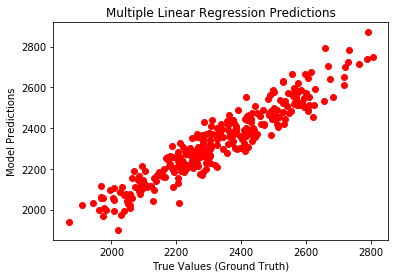

In [24]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [25]:
k = X_test.shape[1] #value of 
n = len(X_test)

In [26]:
n

300

In [27]:
k

2

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [29]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  62.377 
MSE = 3890.8645461540823 
MAE = 50.73299749611361 
R2 = 0.8961726035397262 
Adjusted R2 = 0.8954734291527883 
MAPE = 2.186460482493305


In [30]:
from mpl_toolkits.mplot3d import Axes3D #Step6-Visualizing the dataset

In [31]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [32]:
x_surf.shape

(100, 100)

In [33]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } ) 

In [34]:
onlyX.shape

(10000, 2)

In [35]:
fittedY = regressor.predict(onlyX)

In [36]:
fittedY.shape

(10000,)

In [37]:
fittedY = fittedY.reshape(x_surf.shape)

In [38]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

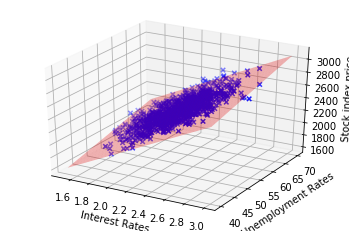

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

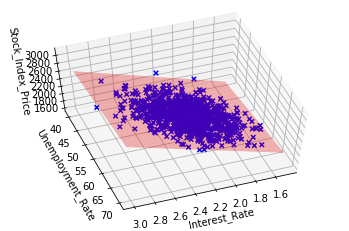

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [41]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,724.156220
Employment,12.402798
